In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.read_csv('D:\Python\Markowitz_Data.csv', index_col = 'Date')

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,61.119999,1132.989990
2010-01-05,61.139999,1136.520020
2010-01-06,60.849998,1137.140015
2010-01-07,60.520000,1141.689941
2010-01-08,60.439999,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


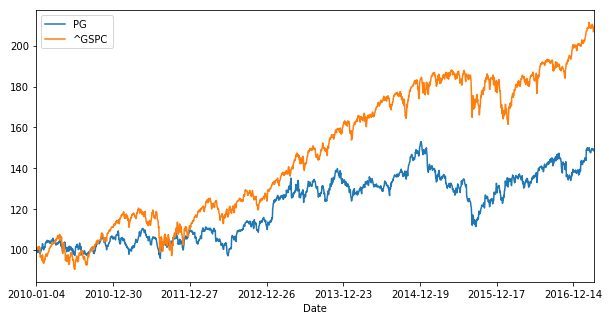

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([ 0.85698798,  0.33631427])

In [13]:
arr[0] + arr[1]

1.1933022462485954

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.73520559,  0.26479441])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.066233149432552693

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.017573679250408175

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.13256575444061025

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.077367825142721905,
  0.069089000269355327,
  0.062049211797704389,
  0.074599707785405048,
  0.065729116827358353,
  0.075032421990168449,
  0.067424792884874976,
  0.077141615859234236,
  0.082125545803041683,
  0.063643084748684645,
  0.06055461755447674,
  0.094206302992213095,
  0.058928995588897144,
  0.064155258190676093,
  0.081449062967258984,
  0.099793513421048446,
  0.089291898093704539,
  0.081107565943696613,
  0.059609741187962161,
  0.08710602870655984,
  0.068029649960888255,
  0.071042104663903122,
  0.062953094517643263,
  0.098447374700743065,
  0.073730777252395976,
  0.063263146574504381,
  0.076886234092792216,
  0.088097196844039952,
  0.081382143987621627,
  0.079998315154313313,
  0.077431015047861082,
  0.07181575686844148,
  0.071632987648173552,
  0.086956739906220881,
  0.074679296570427531,
  0.06912622430466106,
  0.077618994377103206,
  0.084179443789394182,
  0.069803454122346634,
  0.072245353622017533,
  0.087764695597265199,
  0.0906724293021346

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.08693504,  0.08837867,  0.06820849,  0.07528465,  0.06919813,
         0.08007603,  0.07213937,  0.08003531,  0.05879824,  0.0602503 ,
         0.07081818,  0.07887628,  0.07564243,  0.06055945,  0.08085917,
         0.07005612,  0.08090527,  0.06221404,  0.07114276,  0.056635  ,
         0.07800748,  0.06519031,  0.0739145 ,  0.05916653,  0.0764479 ,
         0.06949921,  0.05985916,  0.07818605,  0.06355636,  0.06536648,
         0.06785557,  0.07817714,  0.06035484,  0.07776701,  0.08857038,
         0.08671204,  0.05545107,  0.06801668,  0.093567  ,  0.09222151,
         0.06527044,  0.07192555,  0.05703123,  0.07340262,  0.08088542,
         0.0783105 ,  0.0911424 ,  0.05423076,  0.08574196,  0.06899288,
         0.06777693,  0.0740063 ,  0.08259243,  0.06236284,  0.06001582,
         0.08411616,  0.0842931 ,  0.0597758 ,  0.05849563,  0.06313061,
         0.05679309,  0.0710897 ,  0.05978368,  0.09143609,  0.05628717,
         0.07425498,  0.09612861,  0.07637929,  0.0

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.086935,0.136847
1,0.088379,0.138182
2,0.068208,0.131726
3,0.075285,0.130887
4,0.069198,0.131403


In [23]:
portfolios.tail()

,Return,Volatility
995,0.073575,0.130776
996,0.077932,0.131454
997,0.086108,0.136137
998,0.068054,0.131782
999,0.078193,0.131535


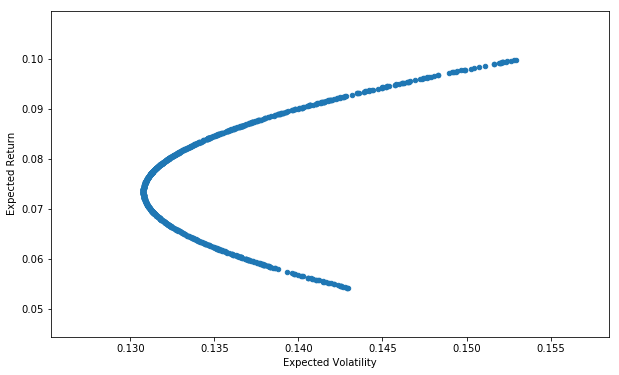

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')